# Car Price Prediction Dataset

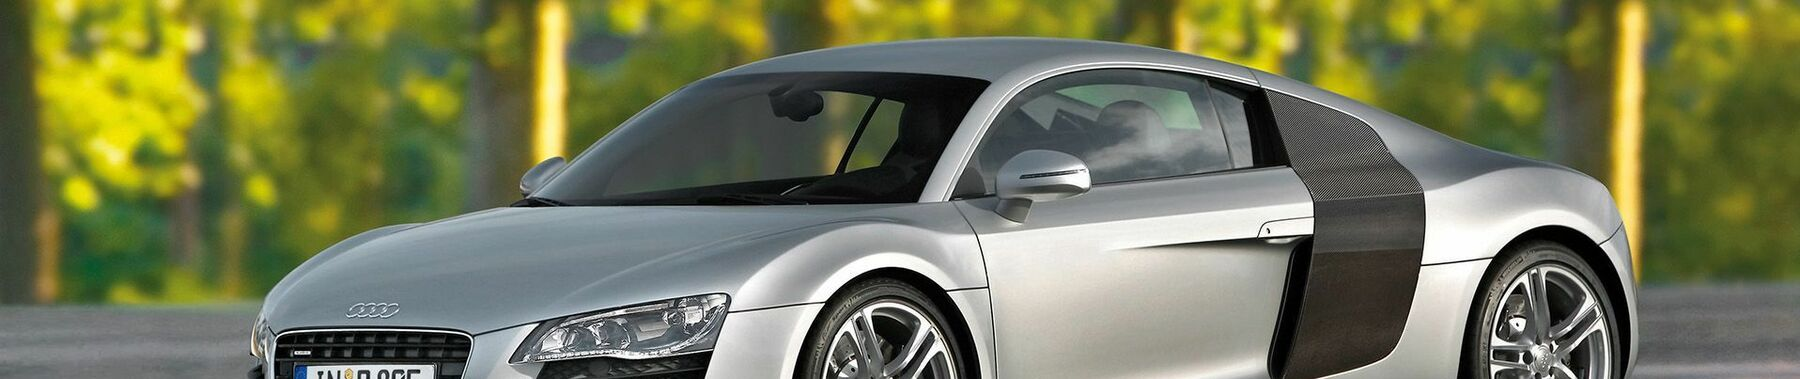
**Source:** https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
**Objective:** Examine car pricing factors such as brand, mileage, and year of manufacture.
\
**Coloms:**
Here are the column names in the dataset:

1. car_ID - Unique identifier for each car
2. symboling - Risk factor rating (-2 to +3)
3. CarName - Name of the car
4. fueltype - Type of fuel (e.g., gas, diesel)
5. aspiration - Type of aspiration (e.g., turbo, std)
6. doornumber - Number of doors (two or four)
7. carbody - Type of car body (e.g., sedan, hatchback)
8. drivewheel - Type of drive wheel (e.g., fwd, rwd)
9. enginelocation - Location of the engine (front or rear)
10. wheelbase - Wheelbase measurement
11. carlength - Length of the car
12. carwidth - Width of the car
13. carheight - Height of the car
14. curbweight - Weight of the car without passengers or cargo
15. enginetype - Type of engine (e.g., ohc, ohcv)
16. cylindernumber - Number of cylinders in the engine
17. enginesize - Size of the engine
18. fuelsystem - Type of fuel system (e.g., mpfi, 2bbl)
19. boreratio - Bore ratio of the engine
20. stroke - Stroke length of the engine
21. compressionratio - Compression ratio of the engine
22. horsepower - Horsepower of the car
23. peakrpm - Peak RPM of the engine
24. citympg - Miles per gallon in the city
25. highwaympg - Miles per gallon on the highway
26. price - Price of the car ​

**Dataset Description**
\
Number of Instances: Varies
\
Number of Features: Multiple (Categorical & Numerical)
\
Target Variable: Car Price
\
**Key Features**
\
Car specifications – Make, model, fuel type, body type, etc.
\
Performance attributes – Horsepower, engine size, mileage, etc.
\
Price factors – Selling price, depreciation, and other relevant attributes.


In [307]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import warnings
warnings.filterwarnings('ignore')

In [308]:
#Reading the data
data = pd.read_csv("/content/CarPrice_Assignment.csv")

In [309]:
#Printing the data
data

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [310]:
#finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

From the info we can see
1. The data has 1030 rows and 9 columns
2. There are no null values and all colomns are numerical no categorial data present




In [311]:
#Print the duplicated rows
data[data.duplicated()]

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]

In [312]:
#finding the mean,Standard deviation ,count, median for columns
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

1. From describing data we can see most of the coloumns have a vast diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present
2. So plotting histogram and boxplot for numerical colomns


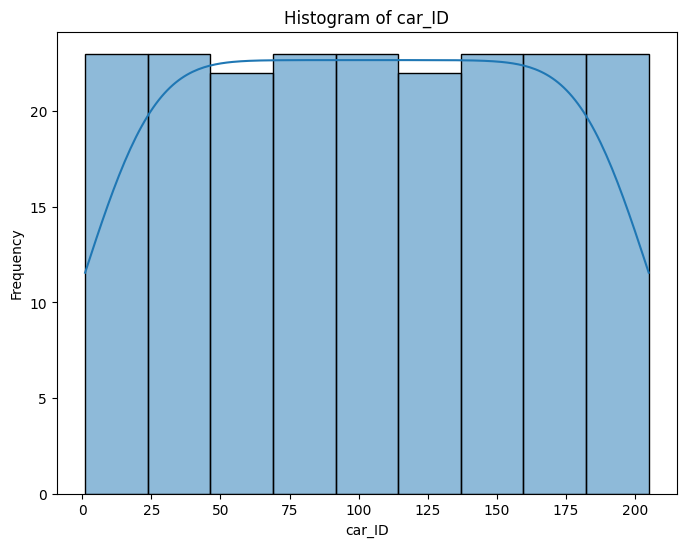

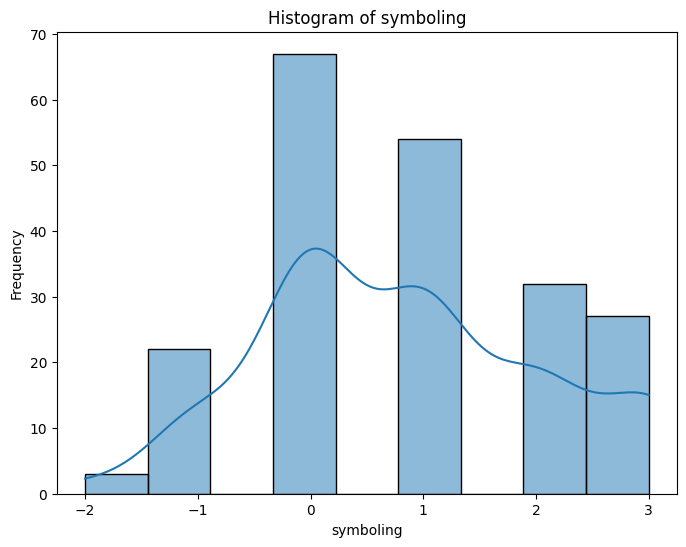

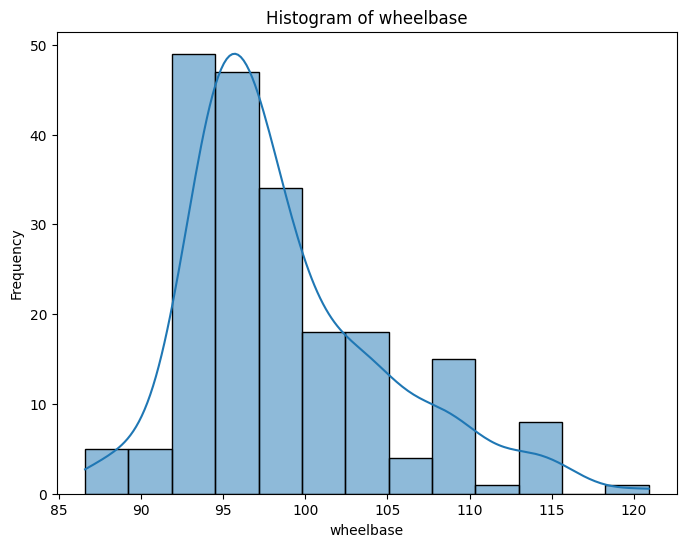

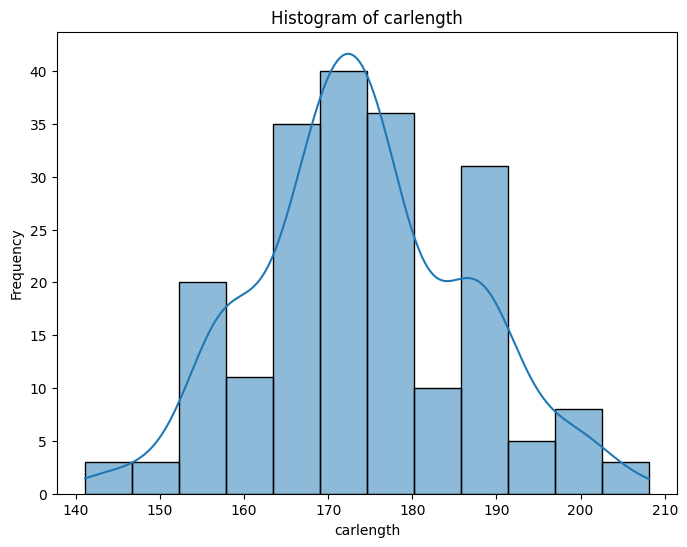

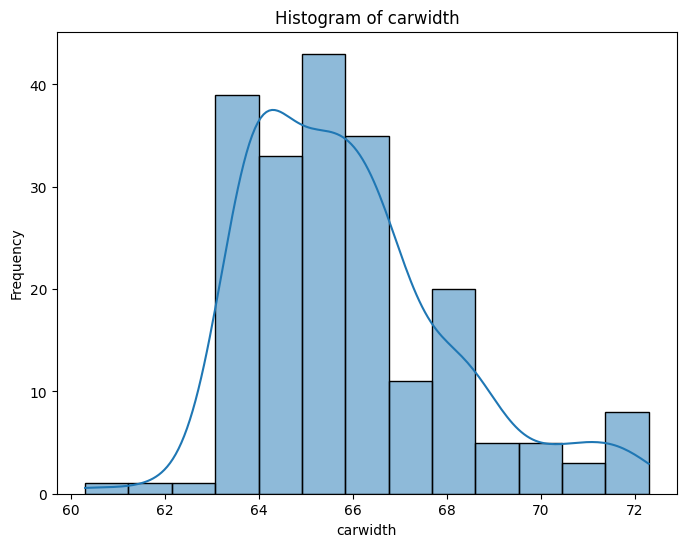

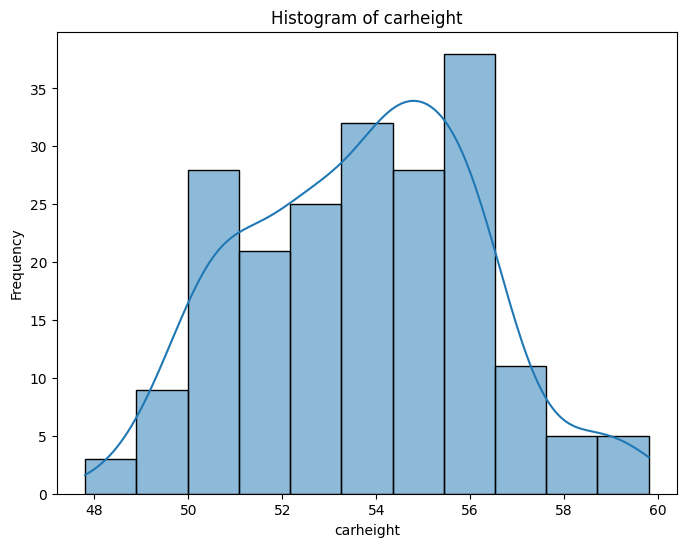

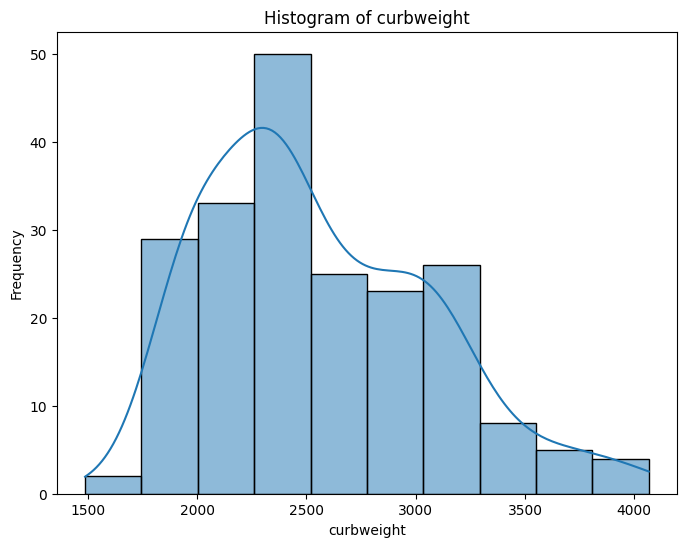

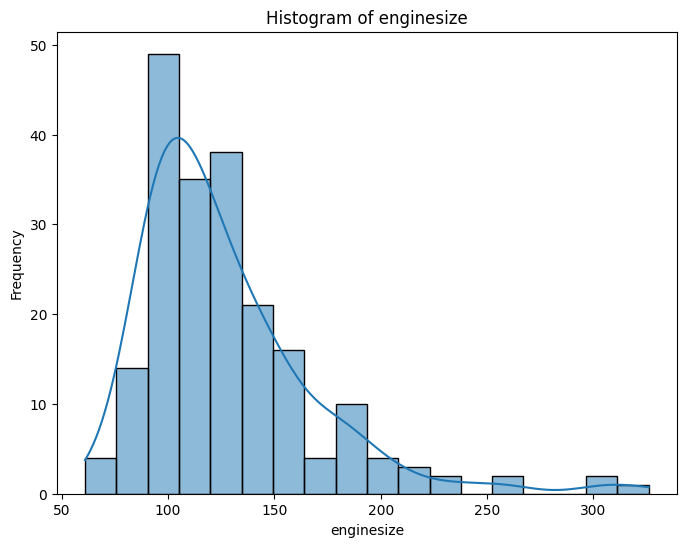

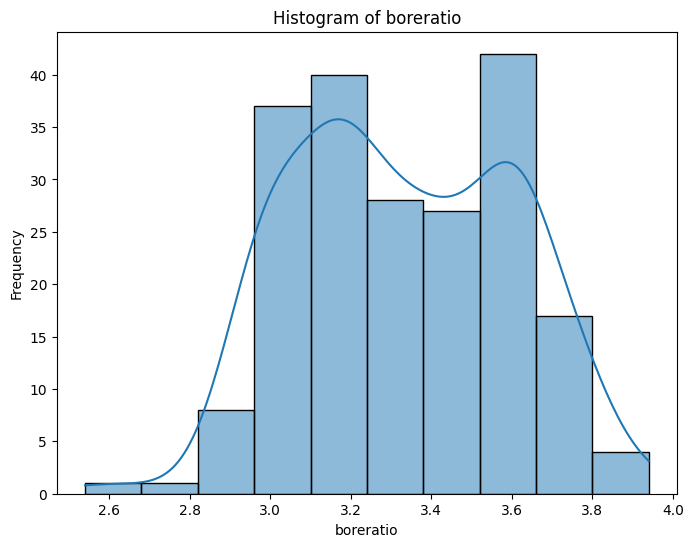

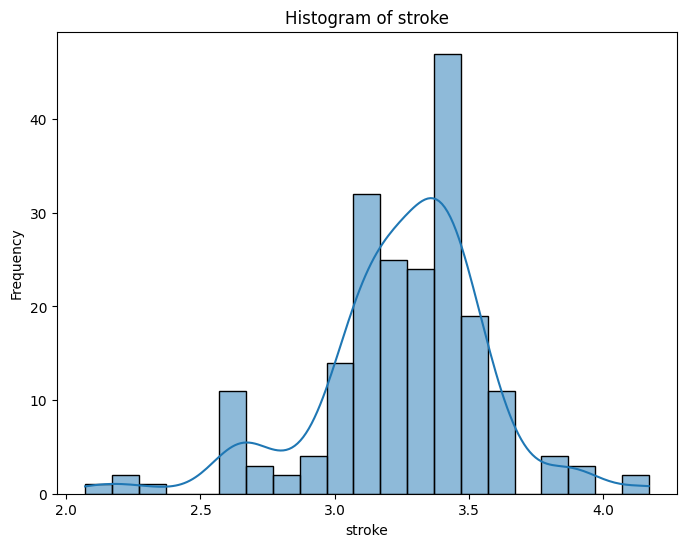

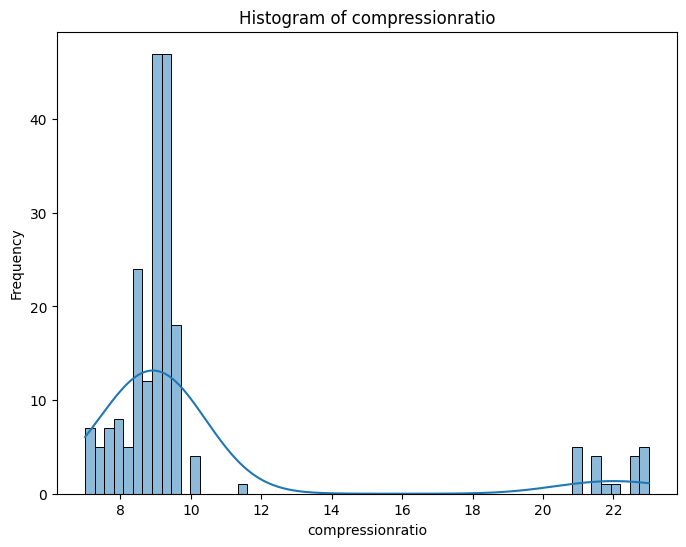

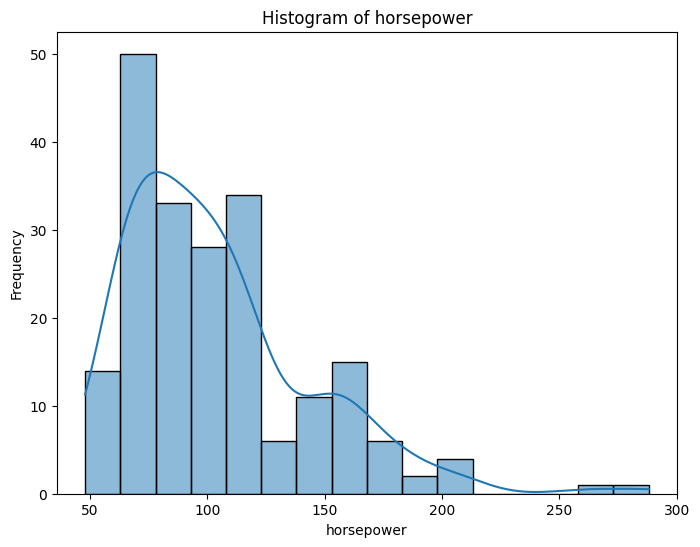

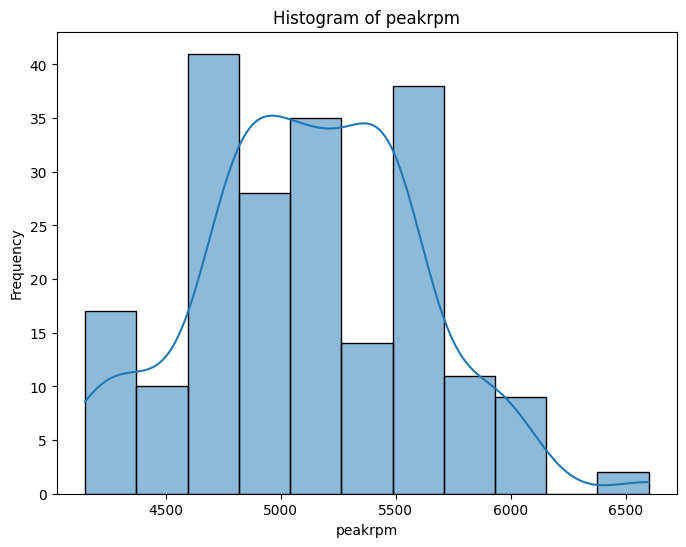

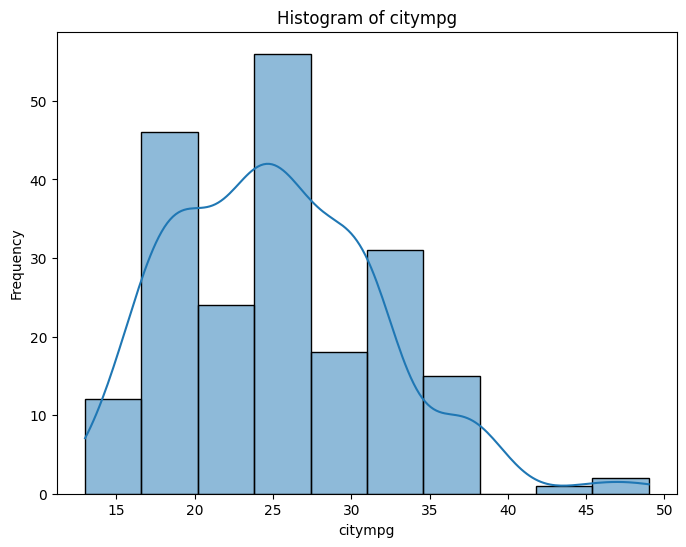

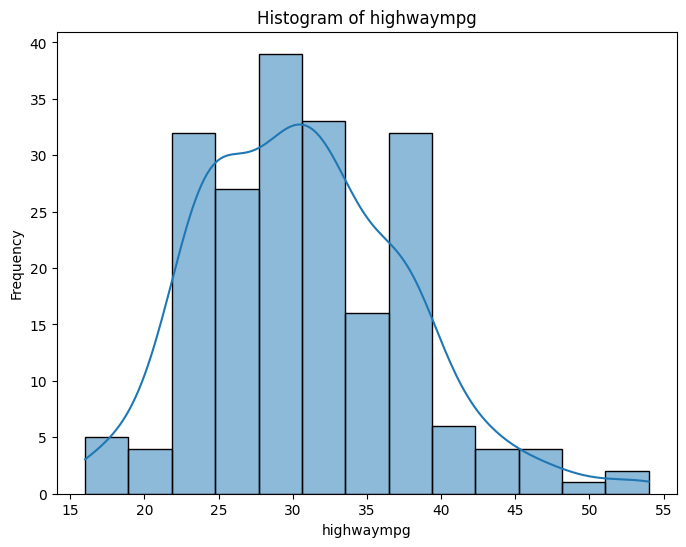

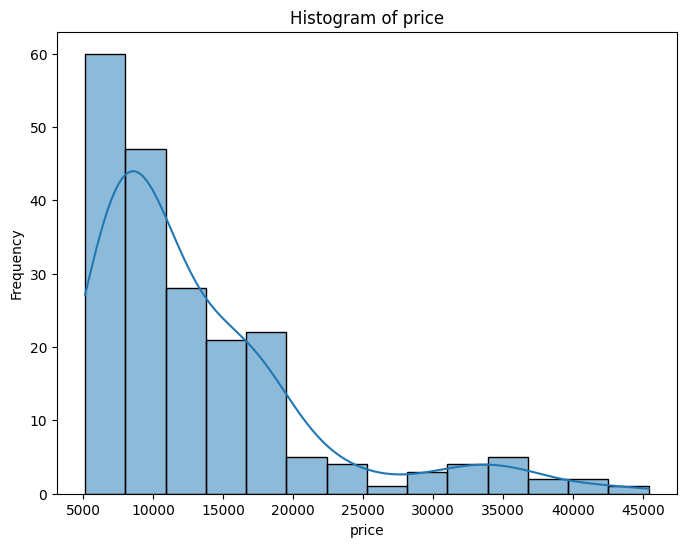

In [313]:
#Histogram for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

  From the histogram
  1. The majority of cars have a symboling value of 0 or 1, indicating moderate risk levels. Fewer cars fall into extreme categories (-2 or 3), suggesting that very safe or very risky cars are less common. The distribution is slightly skewed but mostly centered around neutral risk ratings.
  2. The wheelbase distribution is right-skewed, meaning most cars have a wheelbase around ~95 to 100 units, with fewer cars having larger wheelbases.
  3. The car length distribution appears approximately normal, with most cars having lengths around ~170 to 180 units. There are some variations on both shorter and longer sides, but the data is fairly symmetric with a slight right skew.
  4. The car width distribution is right-skewed, meaning most cars have a width around ~64 to 66 units, with fewer cars having larger widths beyond 70 units.
  5. The car height distribution appears to be slightly right-skewed, with most cars having a height between 50 and 56 units. The peak around ~55 to 56 units suggests a common design standard, while fewer cars have heights beyond 58 units, indicating taller vehicles are less frequent.
  6. The curb weight distribution is right-skewed, meaning most cars have a weight between 2000 and 3000 units, with fewer heavier vehicles beyond 3500 units. The peak around 2500 units suggests a common weight range for most cars.
  7. The engine size distribution is right-skewed, indicating that most vehicles have smaller engines (around 100 to 150 units), while larger engines are less common. The peak around 100 units suggests that compact or mid-size engines dominate the dataset.
  8. The bore ratio distribution appears to be bimodal, with two peaks around 3.2 and 3.6. This suggests that there are two common engine designs in the dataset.
  9. The stroke distribution appears to be slightly right-skewed, with a peak around 3.3 to 3.5. There is also a small secondary peak around 2.5, suggesting some variation in engine designs.
  10. The horsepower distribution is right-skewed, with most vehicles in the 50 to 100 HP range and fewer high-performance cars above 200 HP.
  11. The peak RPM distribution is roughly bimodal, with peaks around 4800 to 5000 RPM and 5500 RPM, suggesting two common engine tuning trends. Additionally, the spread of values indicates a moderate level of variation, meaning different vehicle types may have distinct performance characteristics.
  12. The city MPG distribution is right-skewed, meaning most vehicles have moderate fuel efficiency, but a few have very high mileage. The two peaks around 20 MPG and 30 MPG suggest distinct categories, possibly compact/economy cars vs. larger vehicles.
  13. The highway MPG distribution is right-skewed, with most vehicles clustered between 25 and 35 MPG. The multiple peaks suggest different categories of vehicles, likely compact cars vs. larger vehicles. The presence of some cars exceeding 50 MPG indicates a few highly fuel-efficient models, possibly hybrids or small-engine vehicles.
  14. The price distribution is right-skewed, with most vehicles priced between 5,000 and 15,000. There are fewer high-end cars, with prices extending up to 45,000. The long tail suggests a small number of luxury or high-performance vehicles driving up the maximum price.

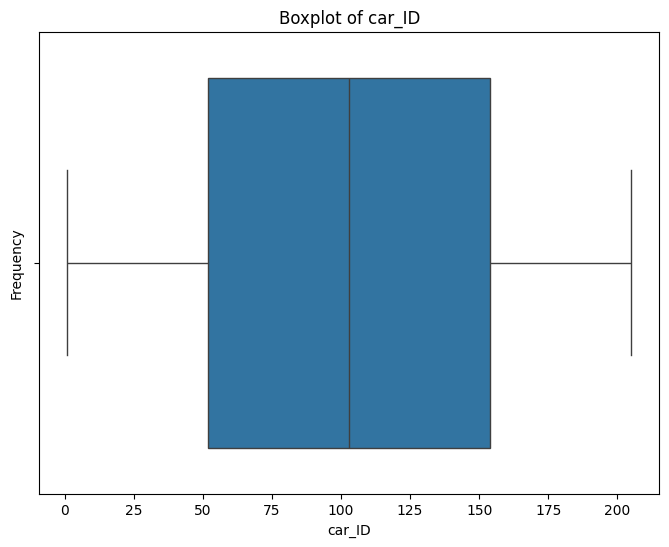

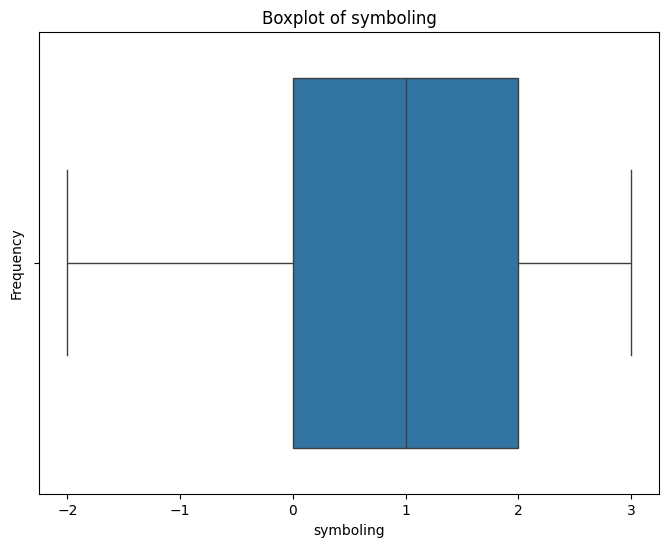

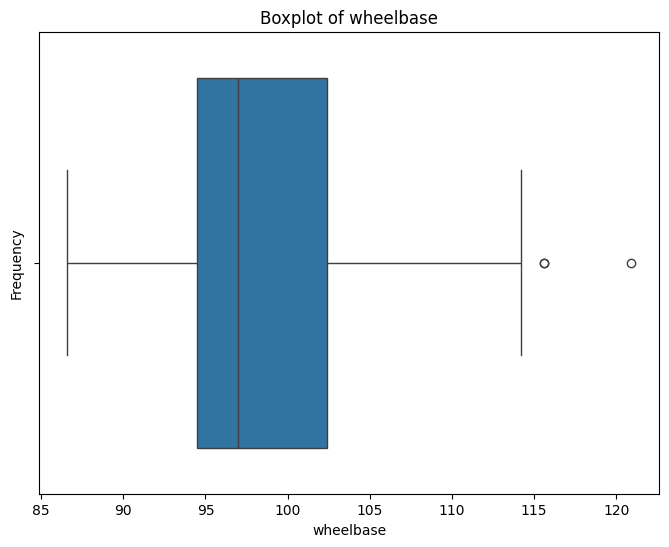

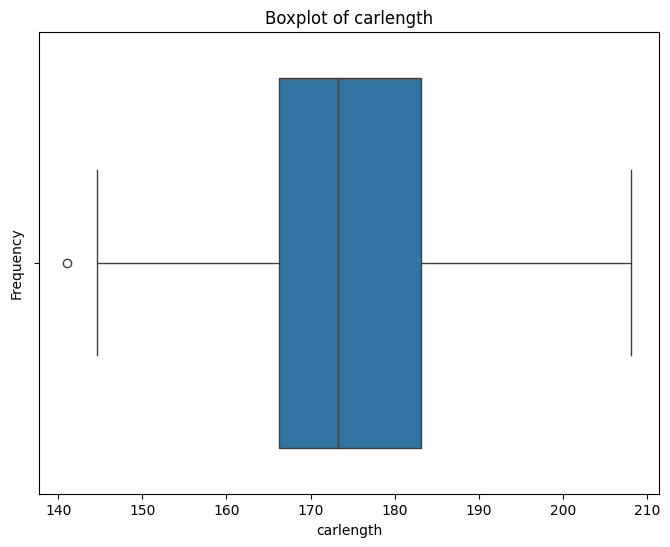

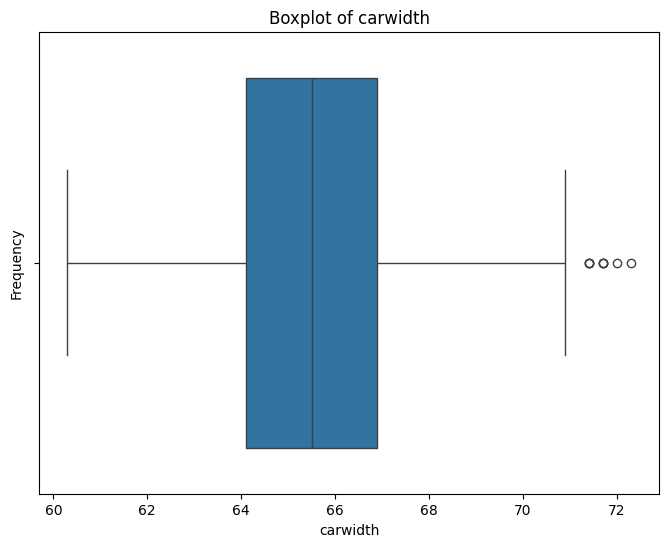

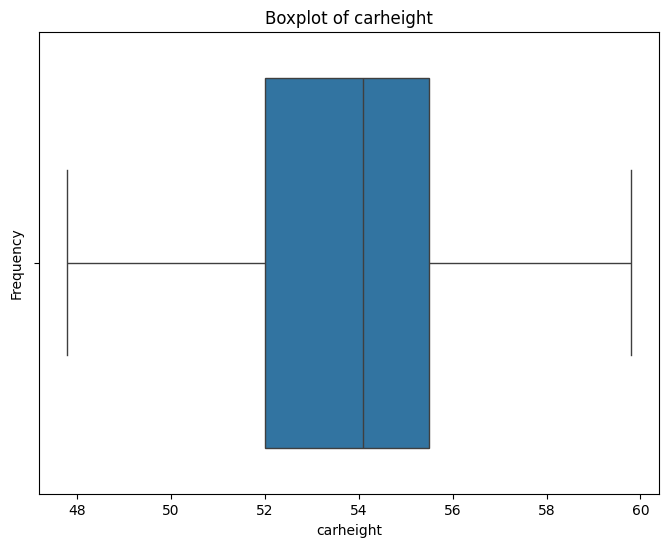

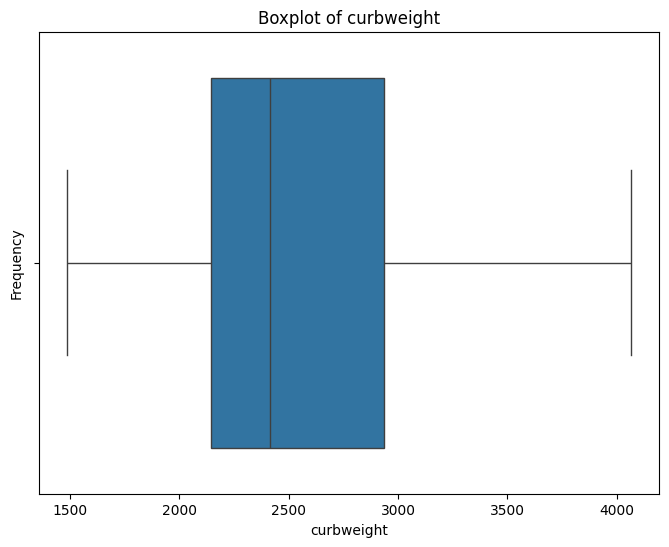

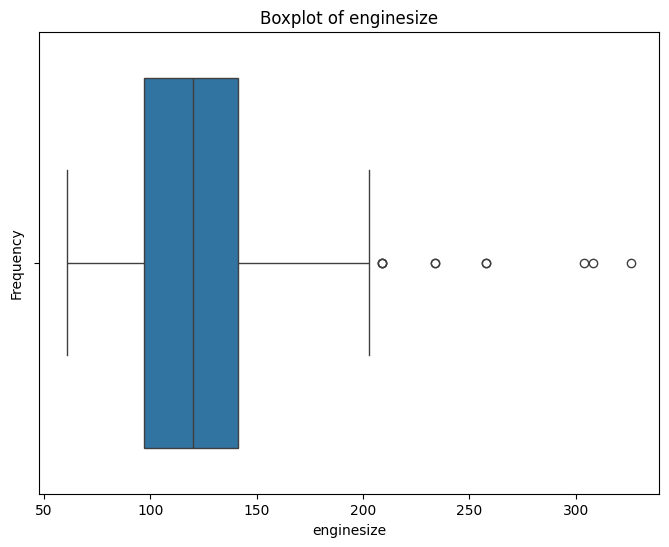

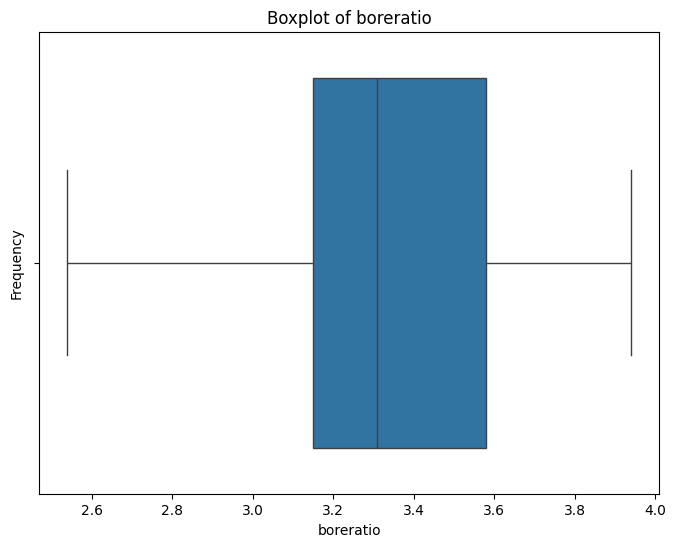

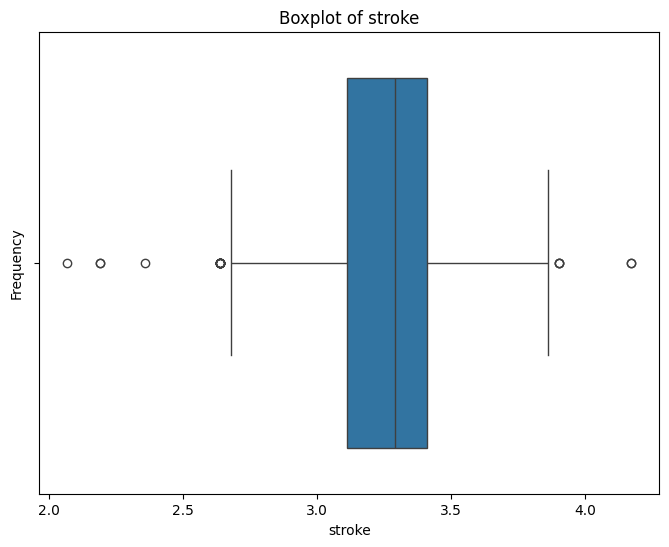

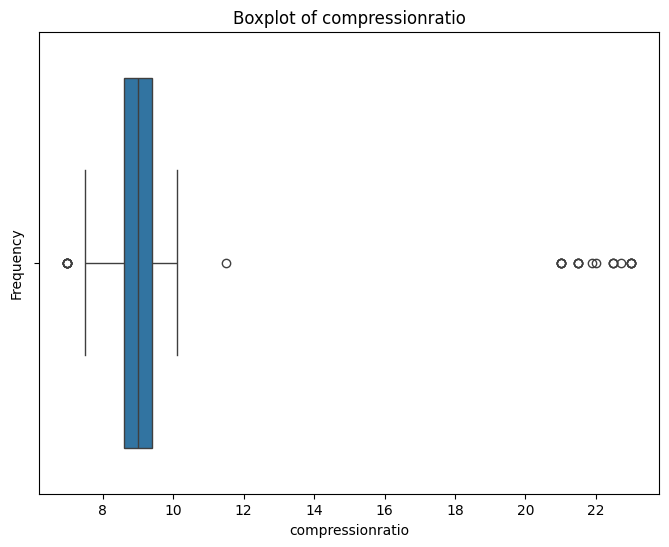

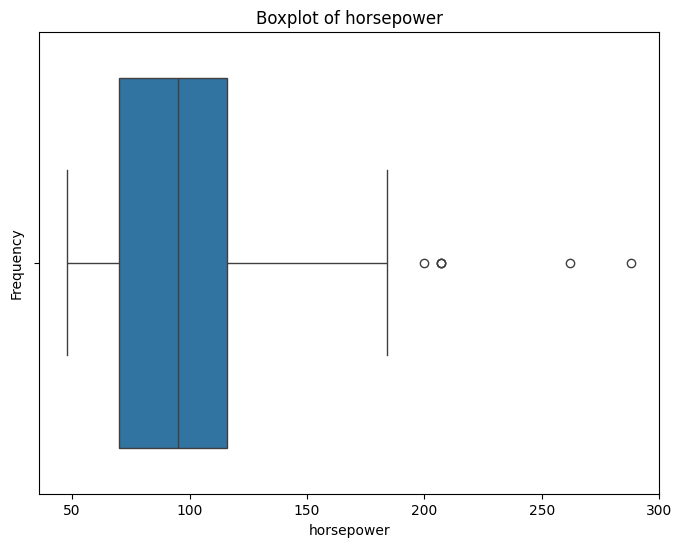

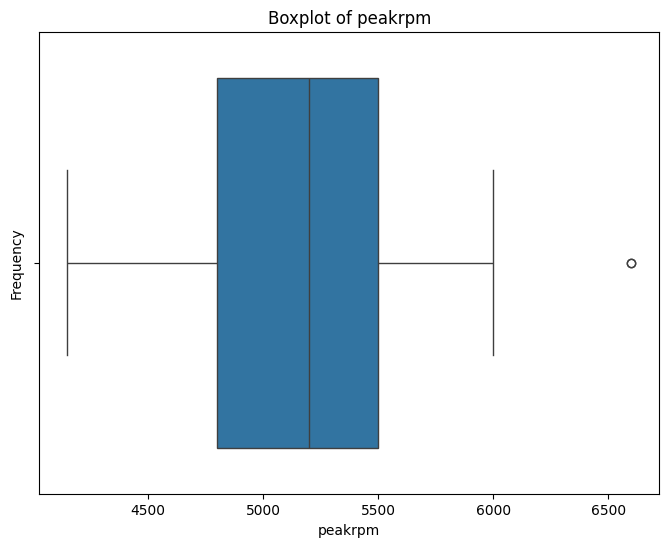

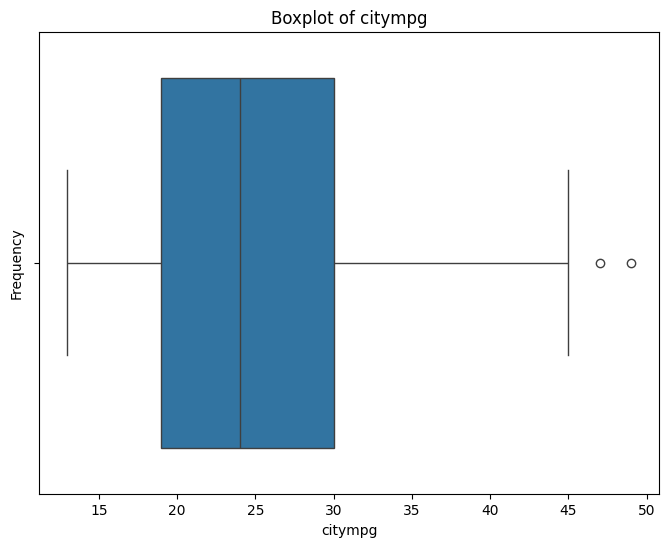

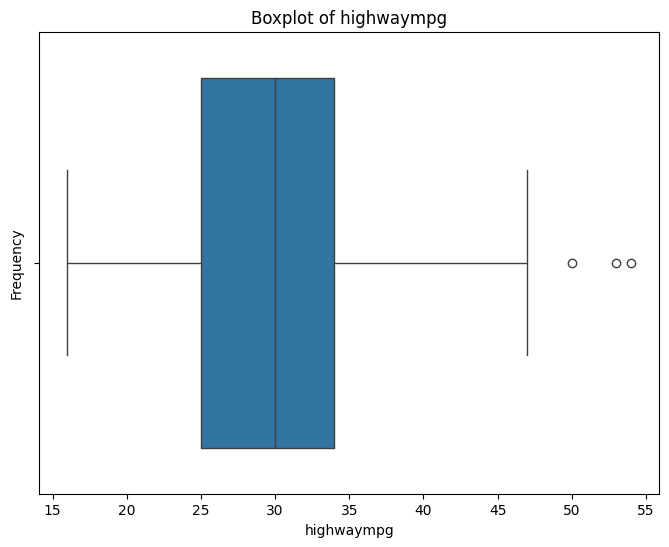

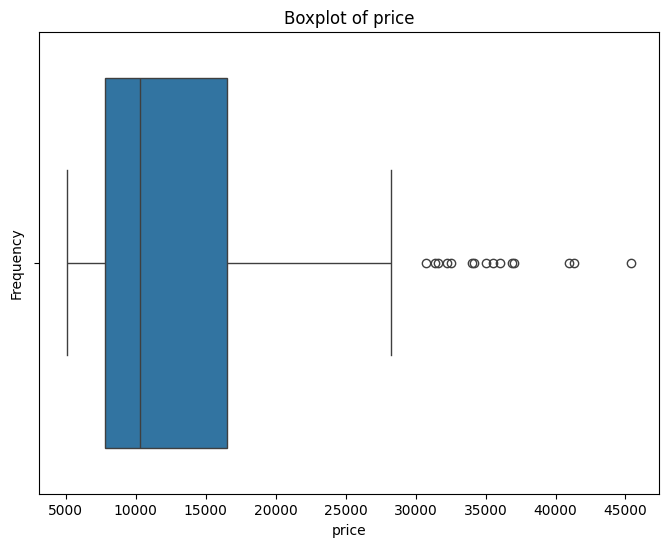

In [314]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot We can see few outliers present in

1. wheelbase has few outliers on right above ~115
2. carwidth has few outliers to right above ~70
3. enginesize has few outliers on right above ~200
4.  stroke has few outliers on bot sides ~< 2.5 and above ~3.8
5.  compressionratio has few outlier around ~< 8 and above ~11
6.  horsepower has few outliers around above ~200
7.  peakrpm has one outliers on the right above ~6000
8.  citympg has only few outlier on the right above ~45
9.  highwaympg has outsiders on the right above ~45
10. Price has few outliers on right above ~30000


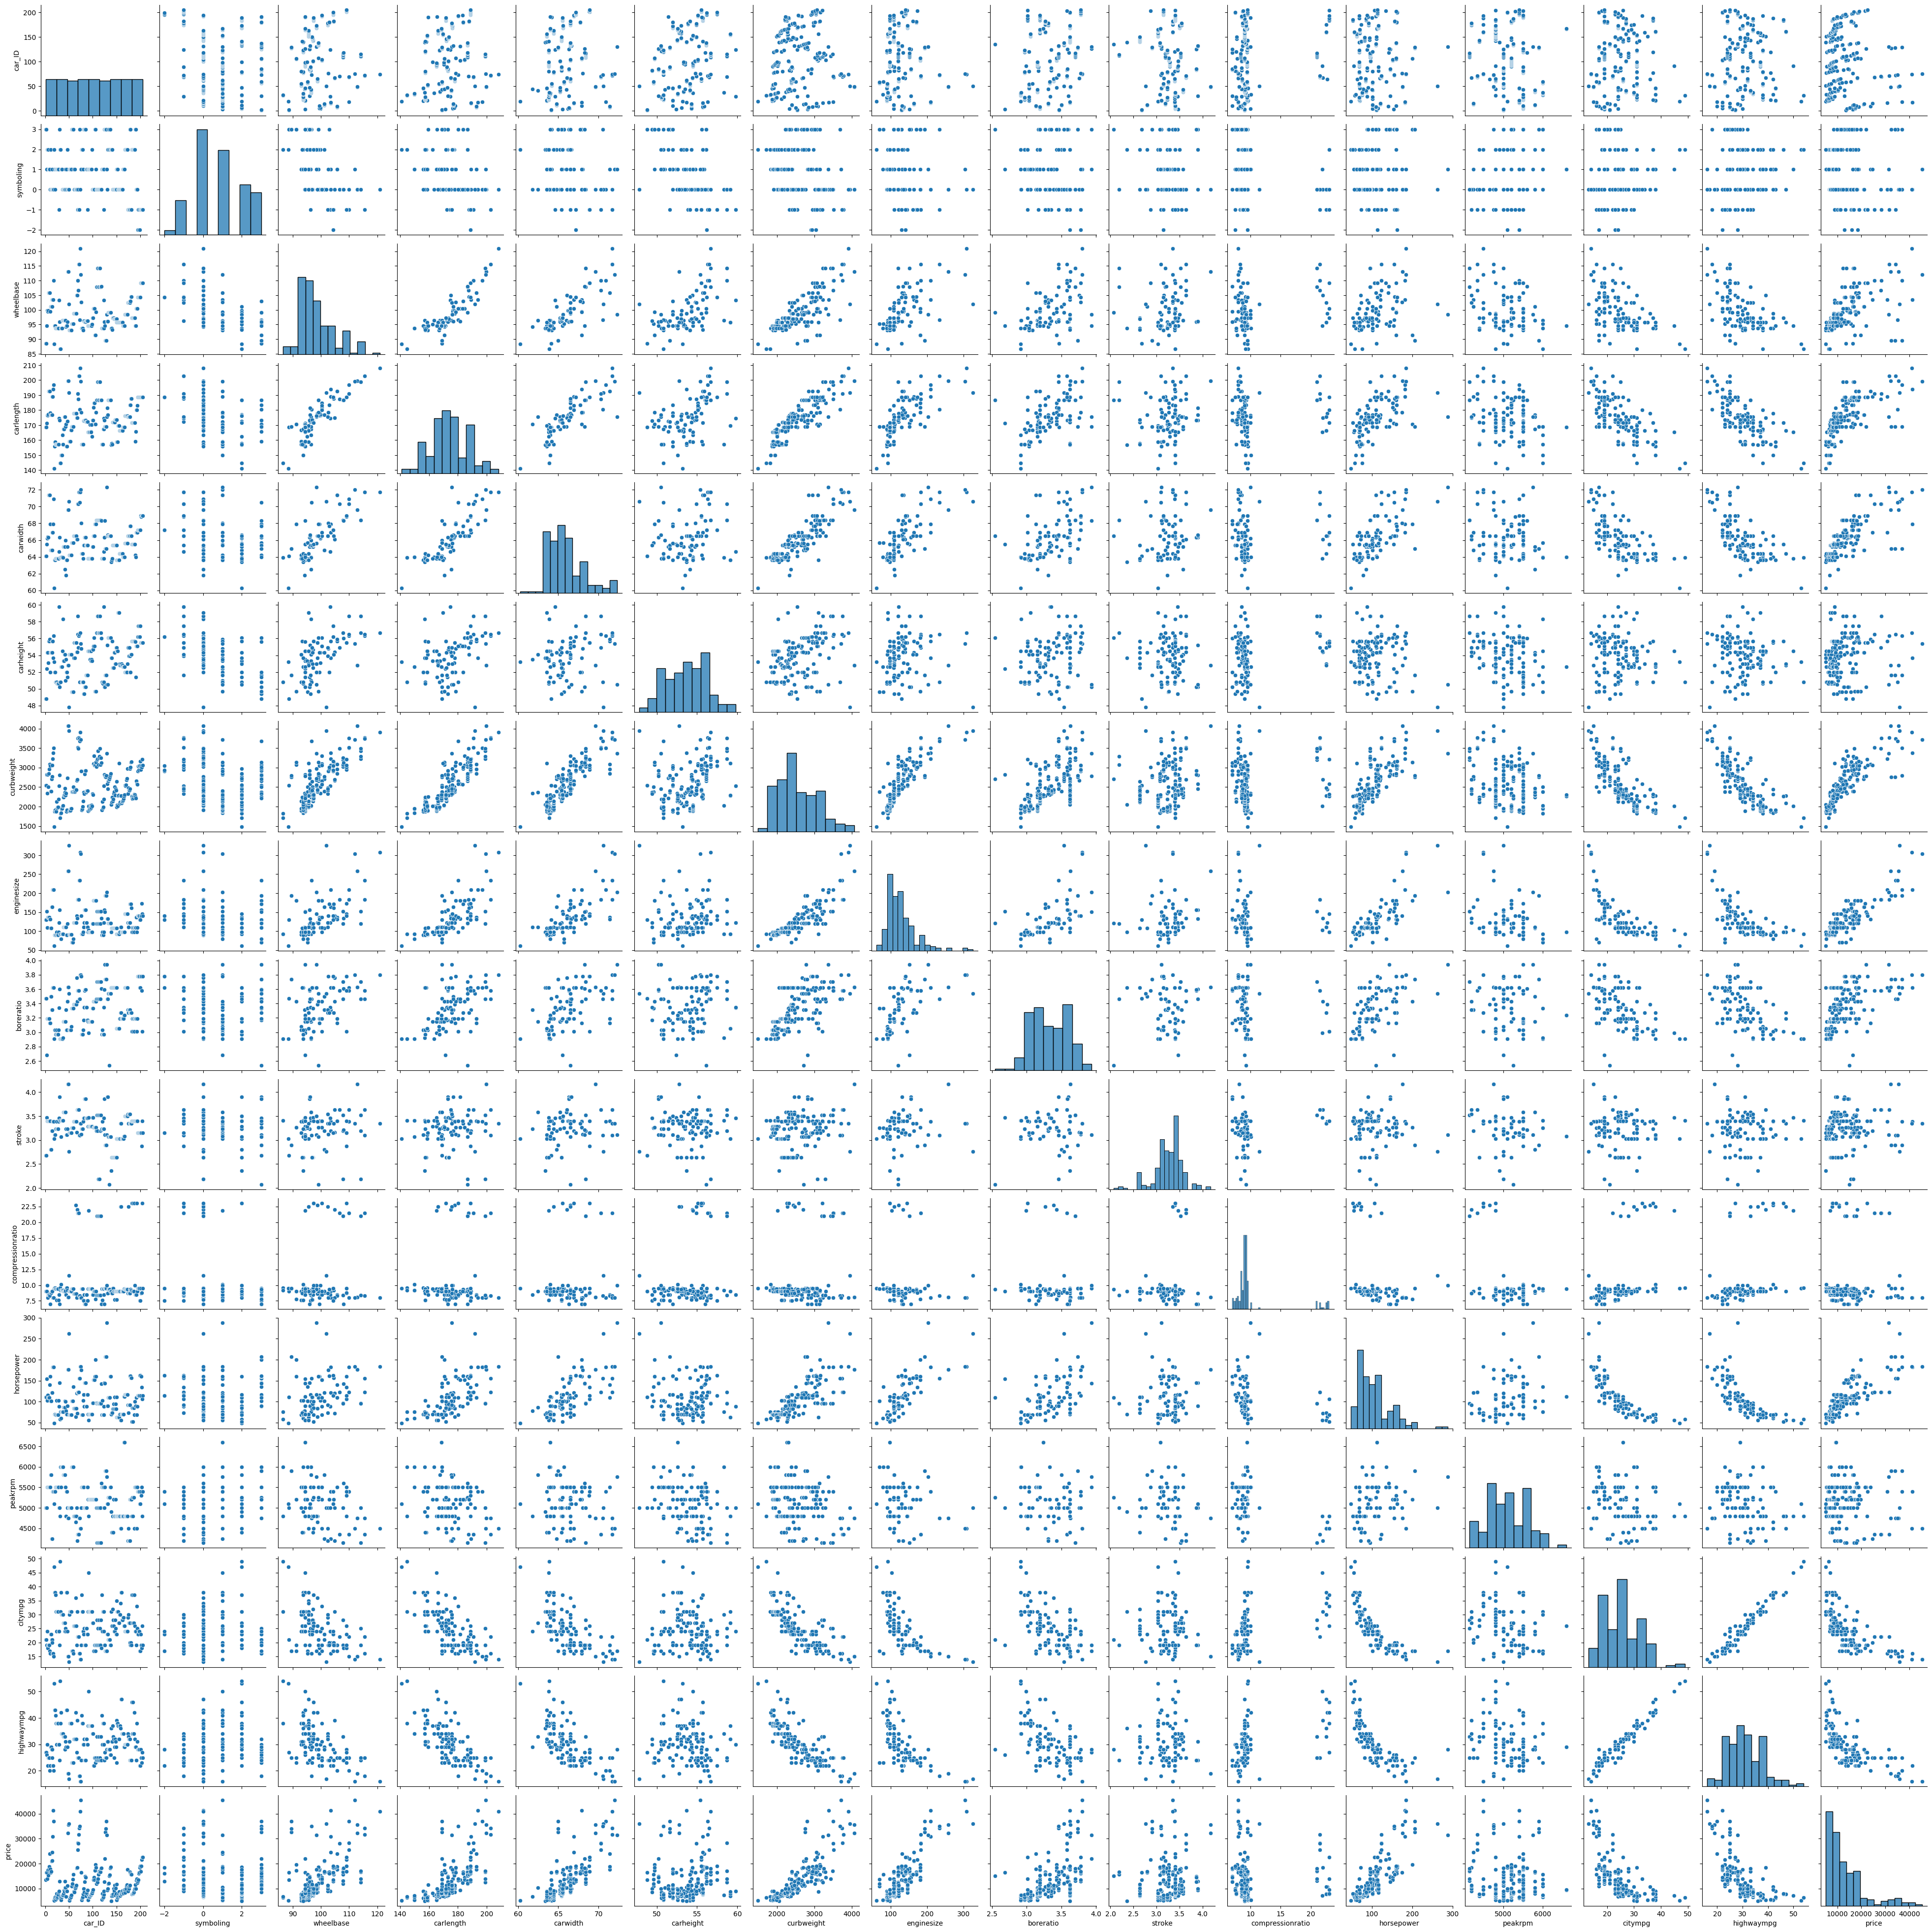

In [315]:
#Pairplot to understand relation between features
sns.pairplot(data)

From the pairplot we can observe
1. symobilng and price have No strong correlation.
Lower symboling values (-2, -1, 0) have a wider price range, some above 30,000.Higher symboling values (2, 3) cluster mostly below 15,000.Cars with higher risk ratings tend to have lower prices.
2. Longer wheelbases are slightly associated with higher prices.Larger cars with longer wheelbases are generally pricier.
3. Cars with high carlenght tend to be pricer. As the carlenght increase we can see an upward trend so price increase
4. Car width has similar effect as car lenght .wider cars tend be more priced
5. As the carheight increase the price seems to increase but it's not strongly related
6. Curbweight and price shows an upward trend which means they are dependent on each other.so as curb weight increases so is price
7. Enginesize as shows an upward trend. so as engine size increase price also increases .
8. Larger bore ratios slightly influence higher prices, but not as strongly as enginesize or horsepower.
9. Stroke dosen't show any clear relation with price.so it deose'nt have much impact on price.
10. compression ratio and price seems to have negative correlation .Higher compression ratios generally relate to lower prices, Lower compression ratios are often linked to more expensive cars.
11. horsepower as shows an upward trend. so as horsepower increase price also increases .More horsepower leads to higher prices.
12. peakrmp seem to have Weak or no clear correlation with price
13. highwaympg shows negative correlation as highwaympg increases, price decreases.
14. cityhmpg shows negative correlation as citympg increases, price decreases.


In [316]:
# Identify outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns with potential outliers
columns_with_outliers = ['wheelbase', 'carwidth', 'enginesize', 'stroke',
                        'compressionratio', 'horsepower', 'peakrpm',
                        'citympg', 'highwaympg']

# Remove outliers
data = remove_outliers_iqr(data.copy(), columns_with_outliers)

Using IQR Method to fix outliers if outliers are on the extreme points use IQR method where we subtract third quartile(75%) and first quartile(25%) to get Iqr value then calulate upperbound and lowerbound values
The IQR method is used to detect and remove outliers in a dataset. It focuses on the middle 50% of the data and filters out extreme values.



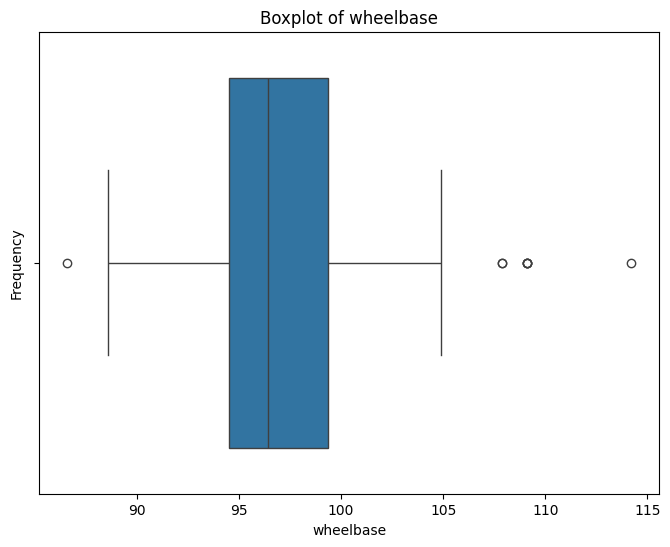

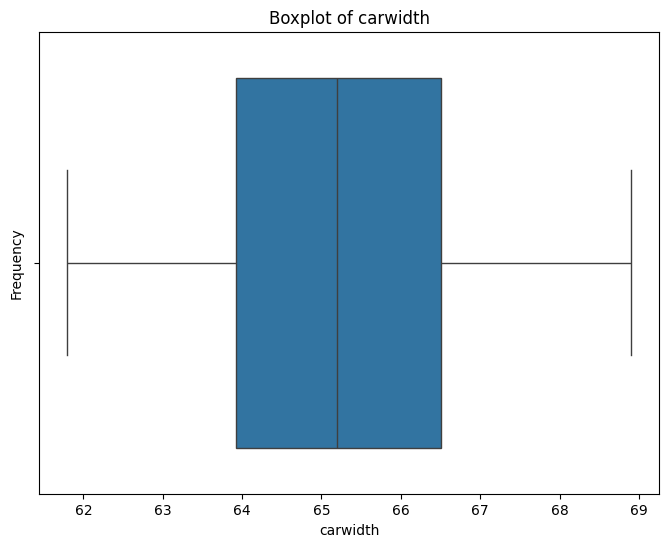

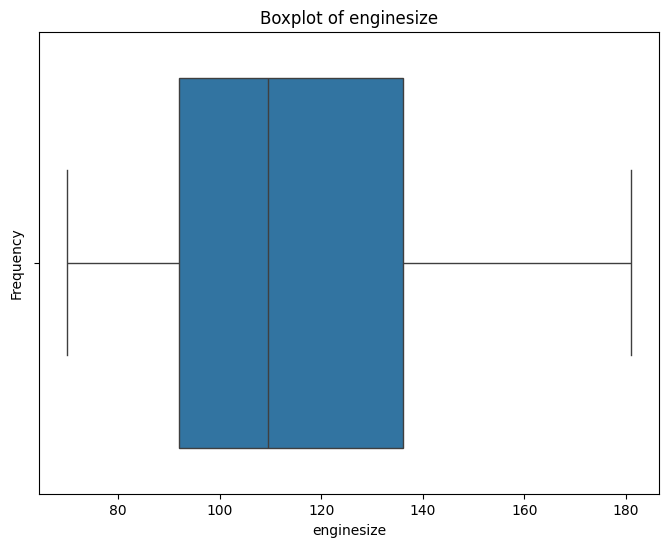

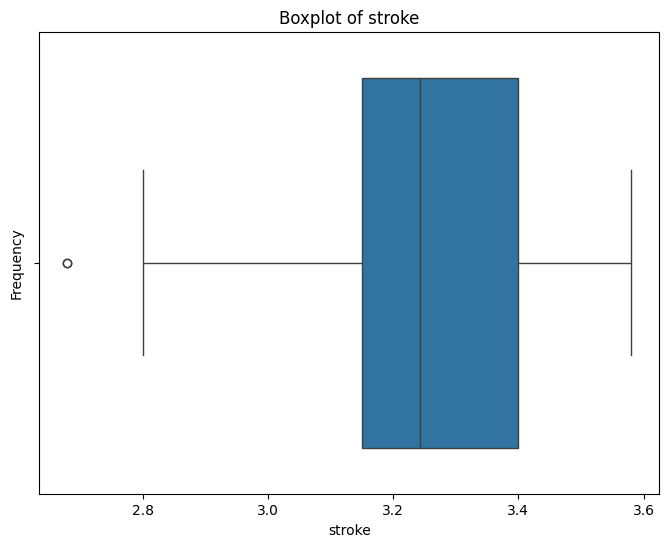

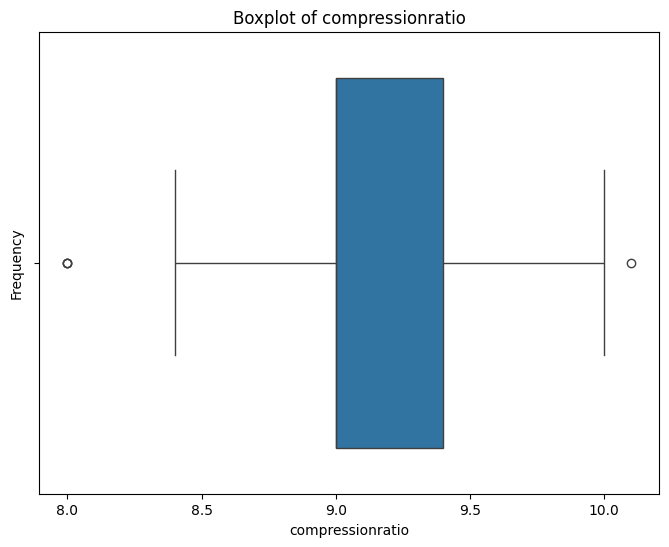

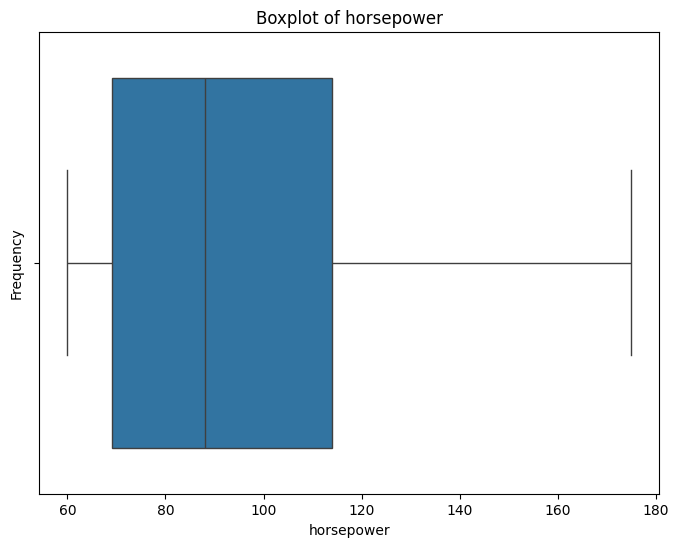

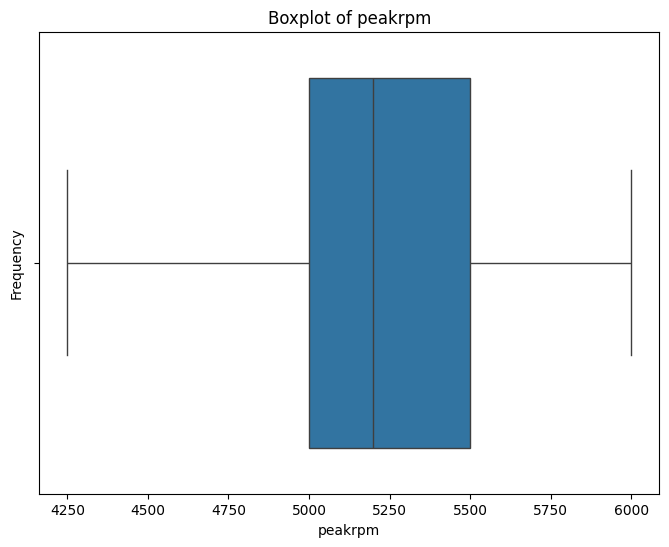

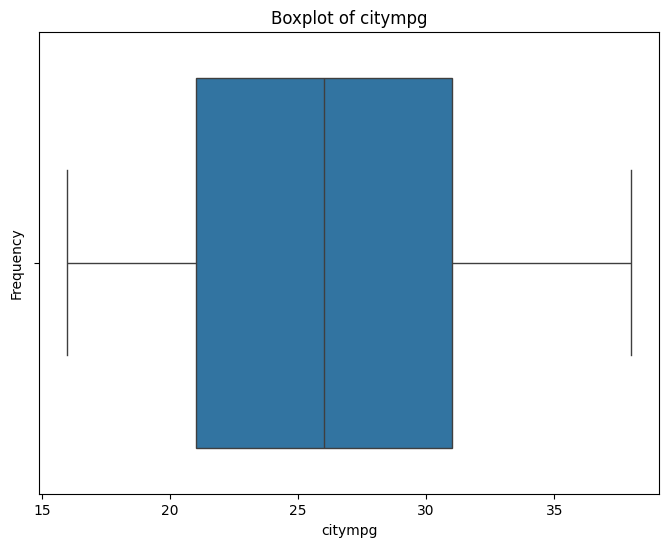

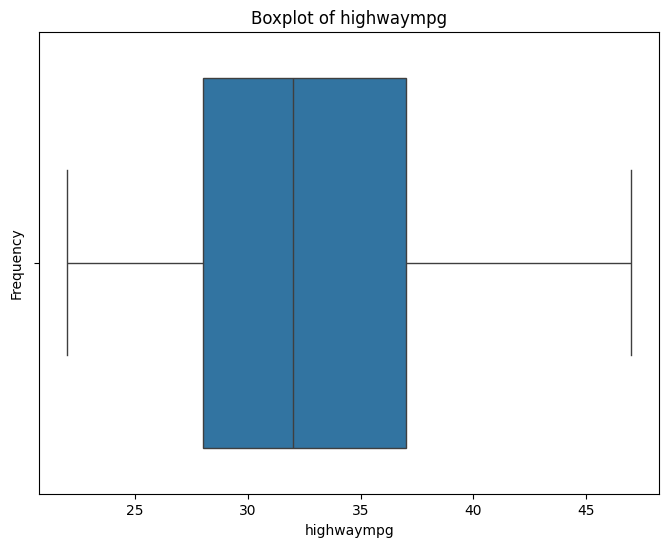

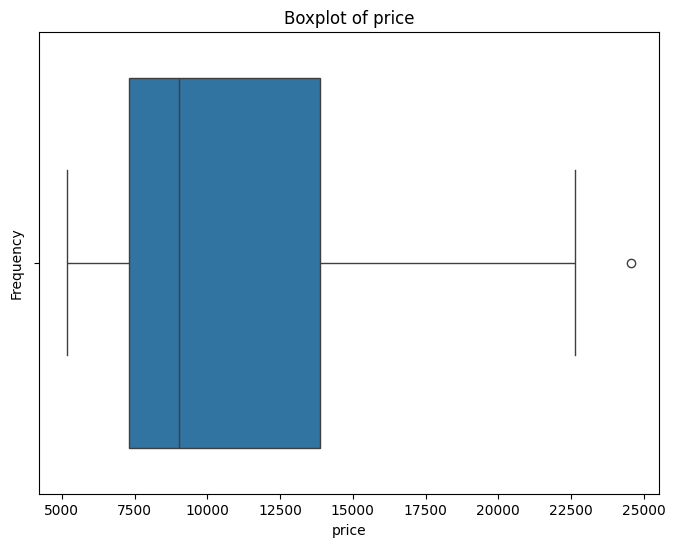

In [317]:
#Boxplot after fixing outliers
columns = ['wheelbase', 'carwidth', 'enginesize', 'stroke',
                        'compressionratio', 'horsepower', 'peakrpm',
                        'citympg', 'highwaympg', 'price'] # Added 'price'

for col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Most of The outliers are fixed so we move to further analysis

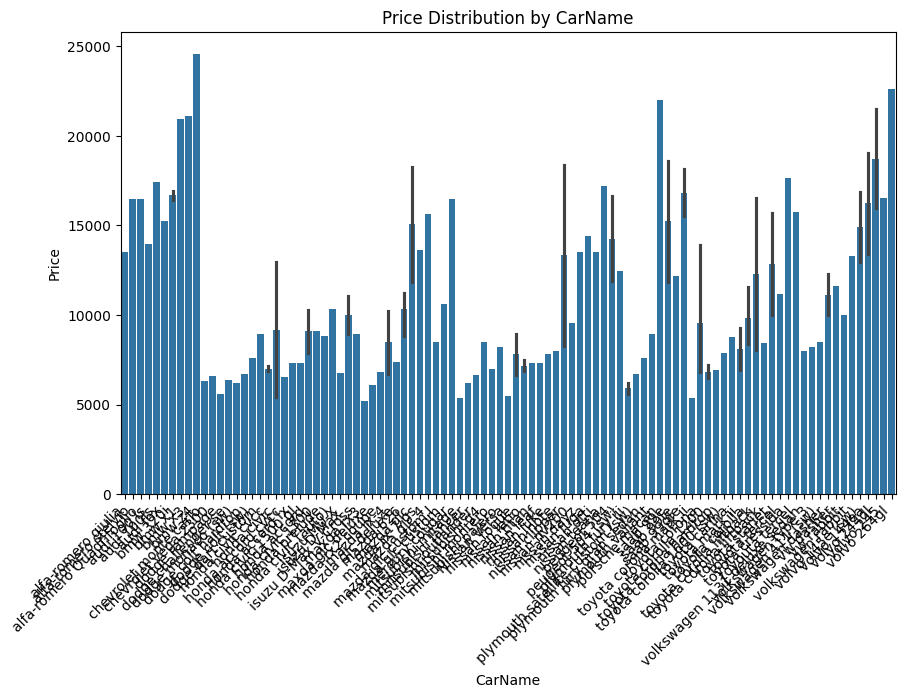

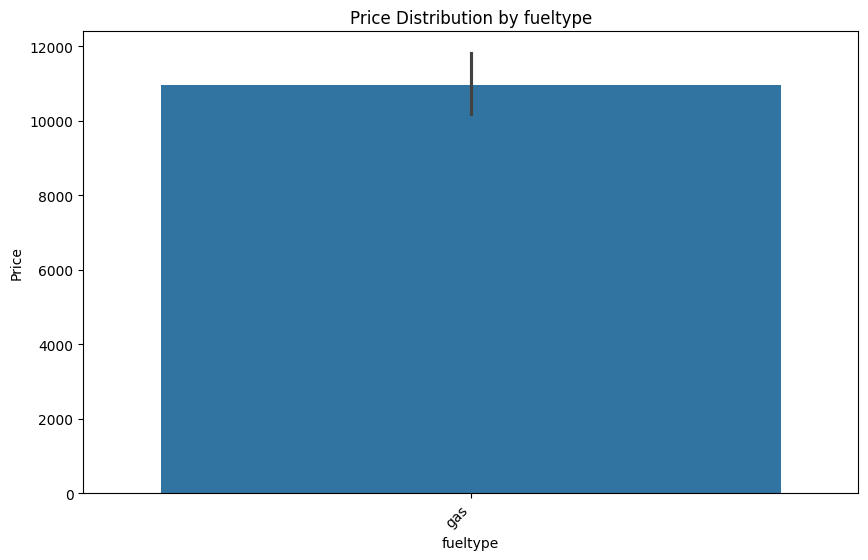

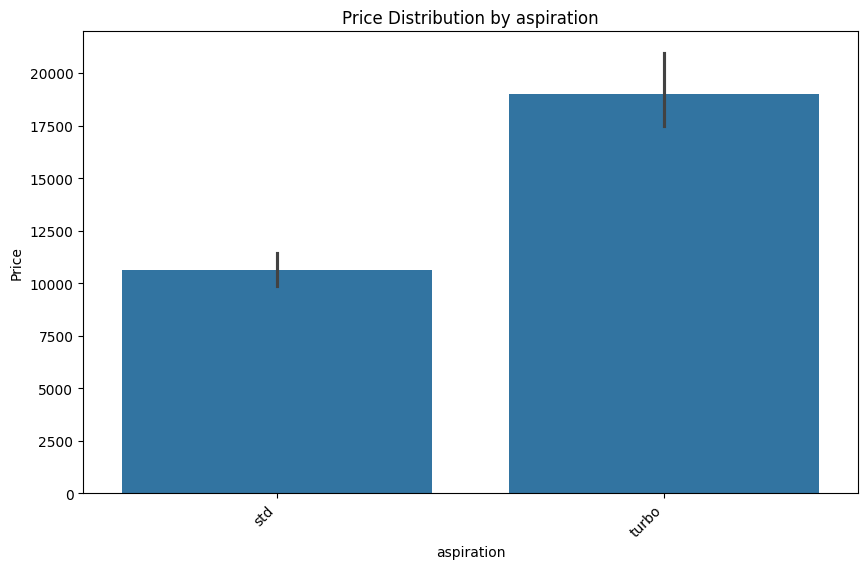

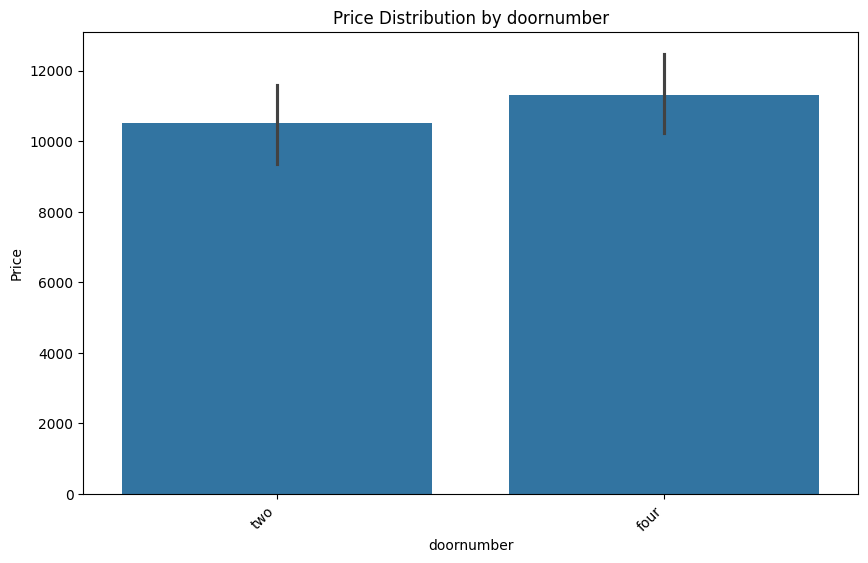

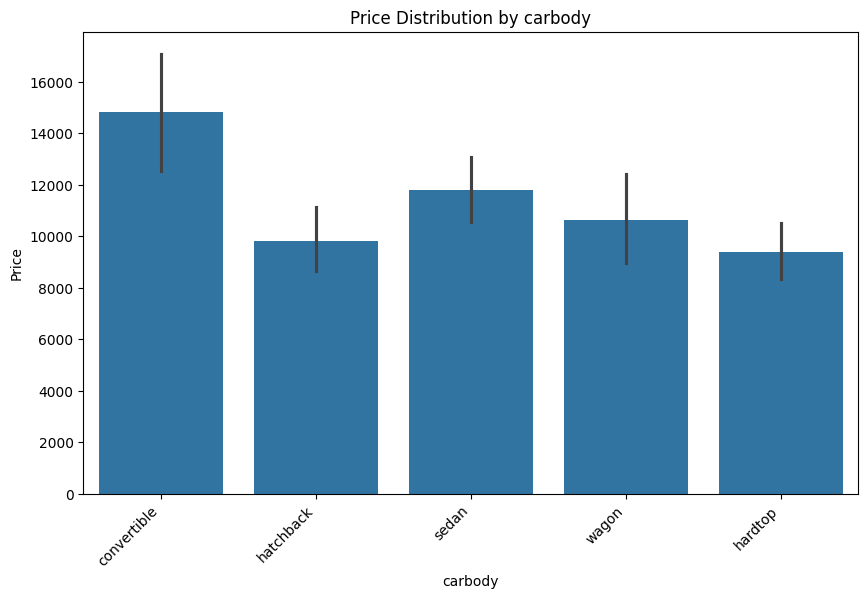

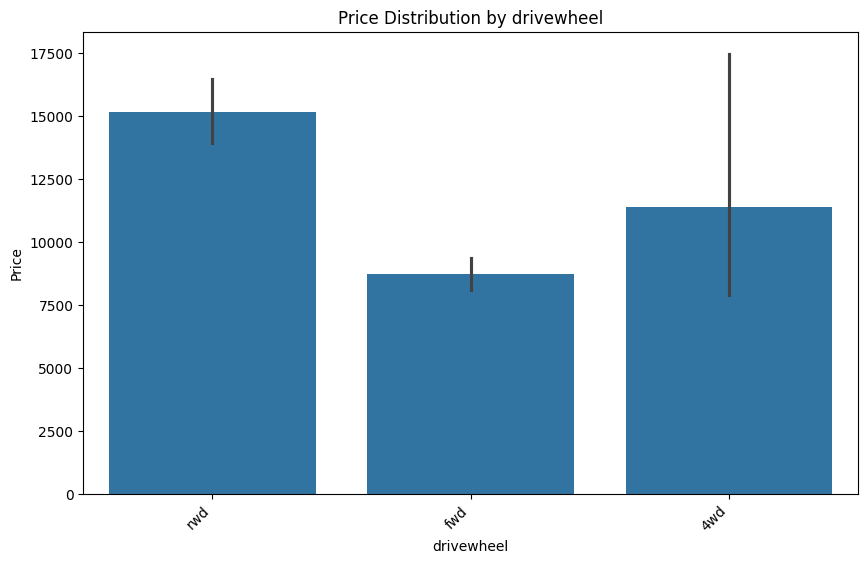

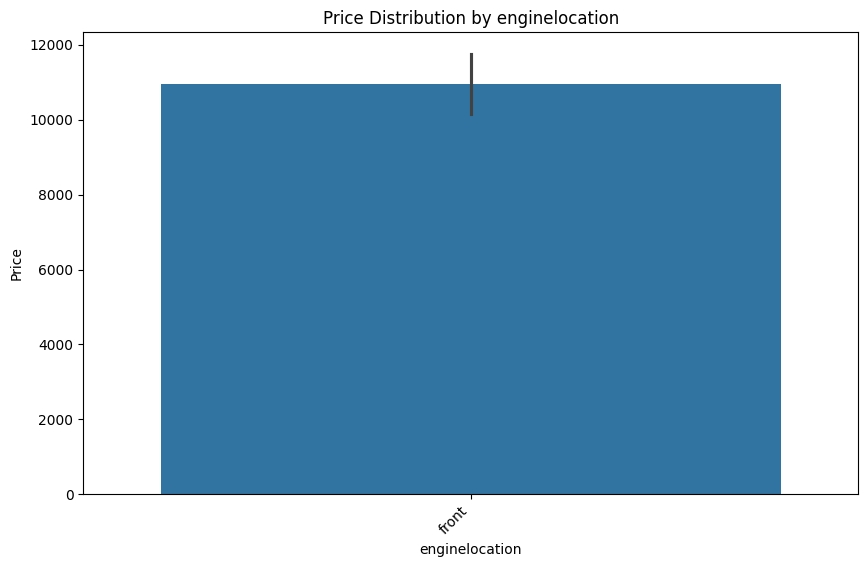

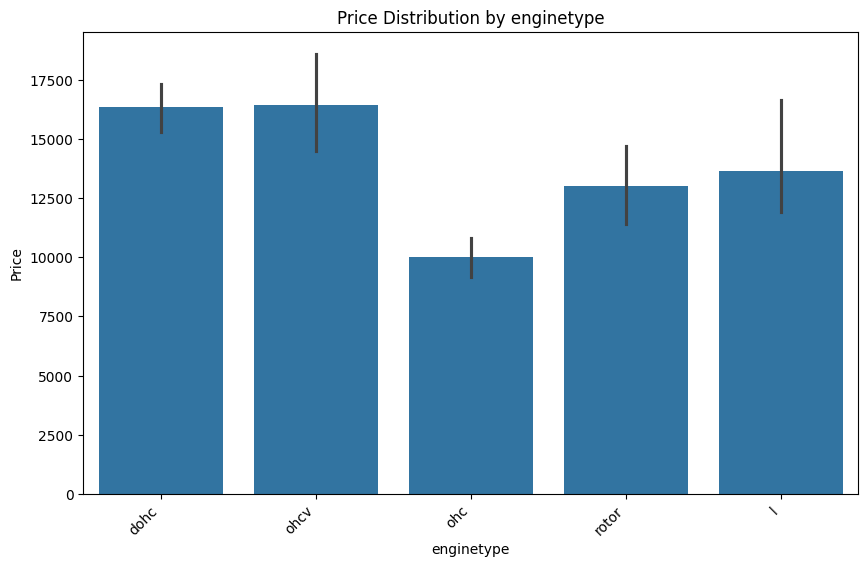

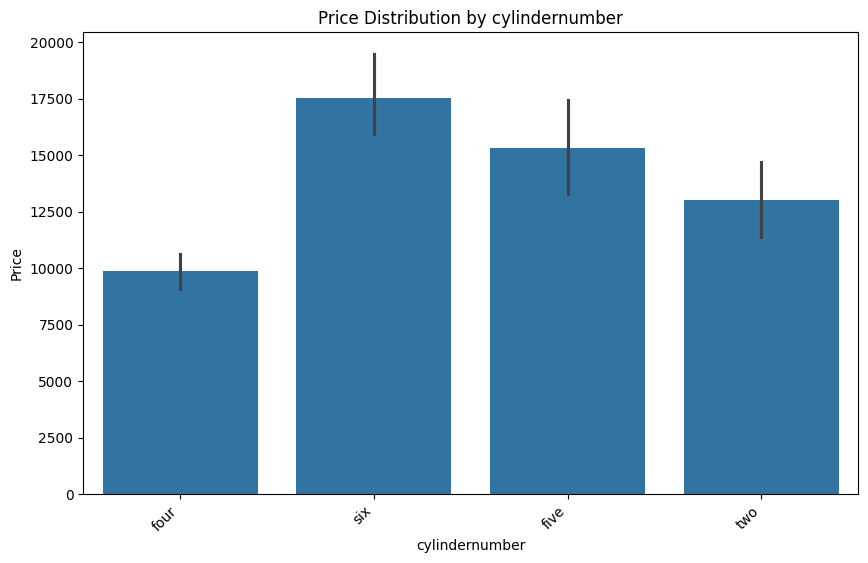

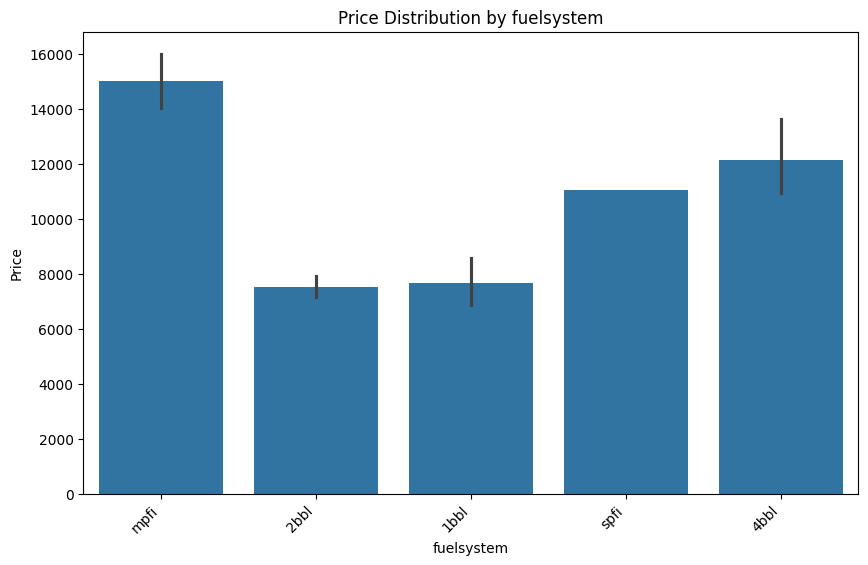

In [318]:
#Barplot for relation between categorial colomns and price
categorical_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber',
                    'carbody', 'drivewheel', 'enginelocation', 'enginetype',
                    'cylindernumber', 'fuelsystem']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='price', data=data)
    plt.title(f'Price Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

From the bargraph we can observe:
1. some brands of cars tend to have higher prices compared to other
2. Cars that have turbo seems to have high price
3. Cars that have fueltype gas has higher price
4. Cars with fourdoors are priced more and cars with two doors are priced slightly lower than the other
5. Convertible cars have high price ~15000 with sedan have a bit lower price than convertible but price more than other cars such as wagon, hatchback ,hardtop
6. RWD (Rear-Wheel Drive) cars tend to have the highest price compared to others.4WD (Four-Wheel Drive) models are also high-priced.
7. Cars with front engine location are priced more
8. DOHC (Double Overhead Camshaft) engines have the highest price range.
OHC and OHV engines are more common in less priced cars
9. Cars with six cylinders have the highest price. and 5 cylindered cars are also priced high but slightly lower than 6 cylindered cars
10. cars with fuel system mpfi(Multi-Point Fuel Injection)  tend to be the most expensive.

In [319]:
#Printing the last five rows in the dataset
data.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
197     198         -1        volvo 245      gas        std       four   
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
197   wagon        rwd          front      104.3  ...         141        mpfi   
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
197       3.78    3.15              9.5        114     5400      24   
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
197          28  16515.0  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
204          25  22625.0  

[5 rows x 26 columns]

In [320]:
#findind counts of each value in car name
car_name_counts = data['CarName'].value_counts()
car_name_counts

CarName
toyota corona          4
toyota corolla         3
mazda 626              3
nissan clipper         2
plymouth fury iii      2
                      ..
mazda rx2 coupe        1
maxda glc deluxe       1
maxda rx3              1
isuzu D-Max V-Cross    1
volvo 264gl            1
Name: count, Length: 97, dtype: int64

In [321]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4',
       'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage',
       'dodge challenger se', 'dodge monaco (sw)', 'dodge colt hardtop',
       'dodge colt (sw)', 'dodge dart custom', 'honda civic cvcc',
       'honda civic', 'honda accord cvcc', 'honda accord lx',
       'honda civic 1500 gl', 'honda accord', 'honda civic 1300',
       'honda prelude', 'honda civic (auto)', 'isuzu MU-X',
       'isuzu D-Max ', 'isuzu D-Max V-Cross', 'maxda rx3',
       'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 4', 'mazda glc custom l', 'mazda glc custom',
       'mercury cougar', 'mitsubishi mirage', 'mitsubishi lancer',
       'mitsubishi outlander', 'mitsubishi g4', 'mitsubishi montero',
       'mitsubishi pajero', 'Niss

In [322]:
#Extract Brand Name from `CarName`
data['CarBrand'] = data['CarName'].apply(lambda x: x.split()[0].lower())  # Extract first word and lowercase

# Print the unique car companies
print(data['CarBrand'].unique())

# Correct Misspelled Brand Names
brand_corrections = {
    'maxda': 'mazda',
    'nissan ': 'nissan',  # Extra space issue
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}
data['CarBrand'] = data['CarBrand'].replace(brand_corrections)

# Print the unique car companies after correction
print(data['CarBrand'].unique())

# Drop the original `CarName` column
data.drop(columns=['CarName'], inplace=True)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'maxda'
 'mazda' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche'
 'saab' 'toyota' 'toyouta' 'volkswagen' 'vw' 'volvo']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'mazda'
 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche' 'saab'
 'toyota' 'volkswagen' 'volvo']


Replacing the wrong or mispelled brand names to one brand name in order to reduce the values in carname

In [323]:
data.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  stroke  \
0          front       88.6      168.8  ...        mpfi       3.47    2.68   
1          front       88.6      168.8  ...        mpfi       3.47    2.68   
2          front       94.5      171.2  ...        mpfi       2.68    3.47   
3          front       99.8      176.6  ...        mpfi       3.19    3.40   
4          front       99.4      176.6  ...        mpfi       3.19    3.40   

  compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0              9.0        111     5000      21          27  13495.0   
1              9.0        111     5000      21          27  16500.0   
2              9.0        154     5000      19          26  16500.0   
3             10.0        102     5500      24          30  13950.0   
4              8.0        115     5500      18          22  17450.0   

      CarBrand  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 26 columns]

In [324]:
# Encoding Categorical Variables (0 and 1) using One-Hot Encoding
categorical_columns = ['CarBrand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

data = pd.get_dummies(data, columns=categorical_columns, drop_first=False)  # Keep all categories

# Convert True/False values to 0 and 1 explicitly
data = data.astype(int)

# Display cleaned dataset
print(data.head())

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3         88        168        64         48        2548   
1       2          3         88        168        64         48        2548   
2       3          1         94        171        65         52        2823   
3       4          2         99        176        66         54        2337   
4       5          2         99        176        66         54        2824   

   enginesize  boreratio  stroke  ...  enginetype_rotor  cylindernumber_five  \
0         130          3       2  ...                 0                    0   
1         130          3       2  ...                 0                    0   
2         152          2       3  ...                 0                    0   
3         109          3       3  ...                 0                    0   
4         136          3       3  ...                 0                    1   

   cylindernumber_four  cylindernumber_six  

Using onehot encoding to get dummy values for categorial colomns

In [325]:
# List all columns that start with 'CarBrand_'
car_brand_columns = [col for col in data.columns if col.startswith('CarBrand_')]

# Calculate correlation for each brand column
brand_price_corr = data[car_brand_columns + ['price']].corr()['price'][car_brand_columns].sort_values(ascending=False)
brand_price_corr

CarBrand_bmw            0.402917
CarBrand_volvo          0.365483
CarBrand_porsche        0.216818
CarBrand_saab           0.192019
CarBrand_audi           0.157438
CarBrand_alfa-romero    0.155672
CarBrand_mercury        0.108828
CarBrand_peugeot        0.092705
CarBrand_volkswagen    -0.040912
CarBrand_mazda         -0.065554
CarBrand_nissan        -0.075351
CarBrand_isuzu         -0.080430
CarBrand_toyota        -0.097587
CarBrand_chevrolet     -0.125399
CarBrand_plymouth      -0.175368
CarBrand_honda         -0.185980
CarBrand_mitsubishi    -0.193750
CarBrand_dodge         -0.198025
Name: price, dtype: float64

Droping the carbrand coloumns as these have a weak correlation with price .hence they are not veery useful in determing the car prices.

In [326]:
# Droping all 'CarBrand_' colomns
car_brand_columns = [col for col in data.columns if col.startswith('CarBrand_')]

# Drop the 'CarBrand_' columns
data = data.drop(columns=car_brand_columns)

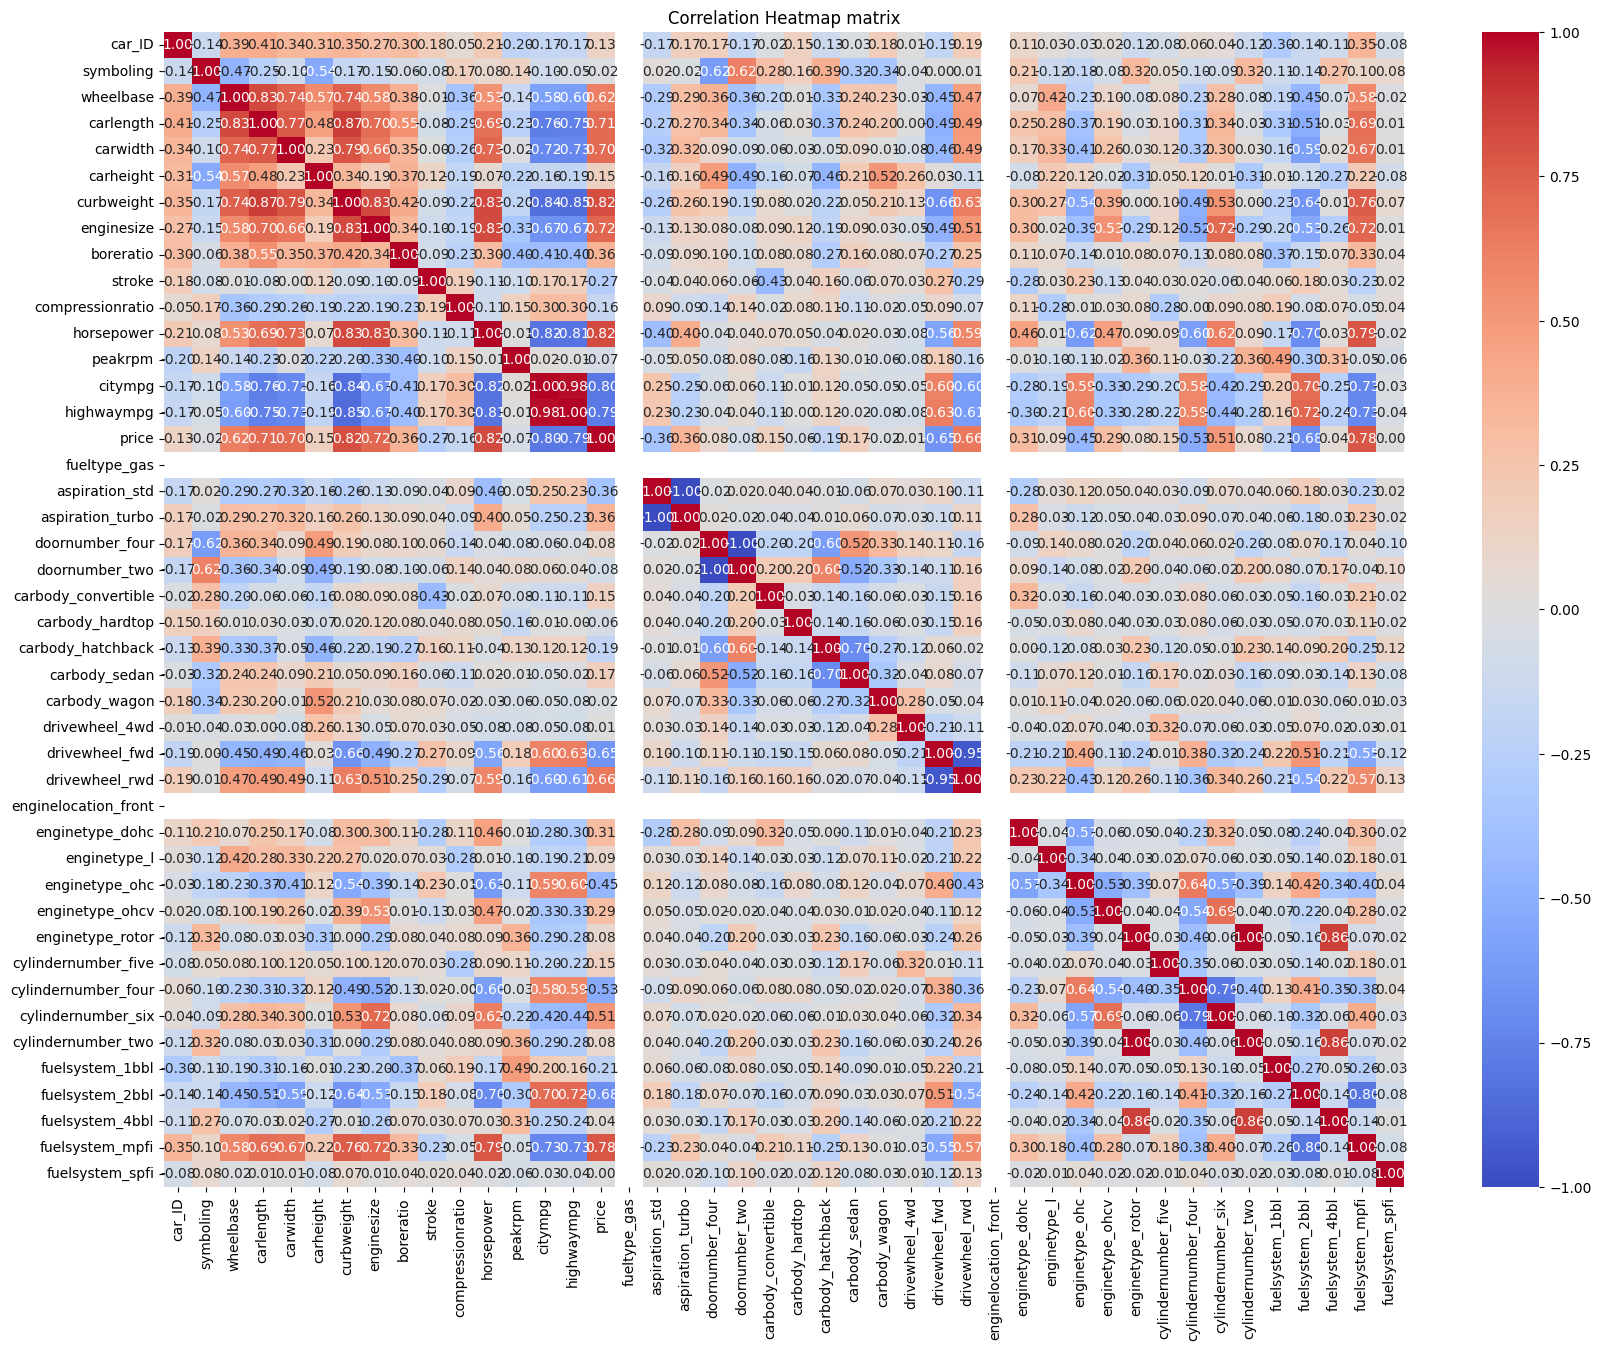

In [327]:
# Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap matrix')
plt.show()


In [328]:
# Calculate the correlation between 'price' and other columns
price_corr = data.corr()['price']

# Filter correlations greater than 0.5
corr_greater_than_50 = price_corr[abs(price_corr) > 0.5]

# Print the filtered correlations
corr_greater_than_50

wheelbase              0.621278
carlength              0.707752
carwidth               0.704499
curbweight             0.818163
enginesize             0.724185
horsepower             0.821528
citympg               -0.795776
highwaympg            -0.785110
price                  1.000000
drivewheel_fwd        -0.649094
drivewheel_rwd         0.655013
cylindernumber_four   -0.530749
cylindernumber_six     0.510755
fuelsystem_2bbl       -0.680213
fuelsystem_mpfi        0.784658
Name: price, dtype: float64

1. Horsepower (0.82) → Horsepower has a strong positive correlation with price. As horsepower increases, the price of the car also increases significantly. This suggests that more powerful cars are generally more expensive.

2. Curbweight (0.82) → There is a strong positive correlation between curb weight and price. Heavier cars tend to have higher prices, possibly due to better build quality, larger engines, and more premium materials.

3. Enginesize (0.72) → Engine size shows a strong positive correlation with price. Cars with larger engines tend to be more expensive, likely due to higher performance and better capabilities.

4. Car length (0.71) → Car length has a strong positive correlation with price. Longer cars are generally priced higher, possibly because they belong to bigger vehicle categories such as sedans and SUVs.

5. Car width (0.70) → Similar to car length, car width has a strong positive correlation with price. Wider cars tend to be more premium and expensive, possibly due to larger cabin space and better stability.

6. Wheelbase (0.62) → Wheelbase has a moderate positive correlation with price. A longer wheelbase often indicates a more spacious and stable car, which may contribute to a higher price.

7. Drivewheel (rwd) (0.66) → Rear-wheel drive (RWD) cars have a moderately strong positive correlation with price. RWD cars tend to be sportier and more performance-oriented, making them more expensive.

8. Cylindernumber (six) (0.51) → Cars with six-cylinder engines show a moderate positive correlation with price. More cylinders generally mean better performance, leading to higher prices.

9. City mpg (-0.80) → There is a strong negative correlation between city mileage and price. Cars with higher fuel efficiency in cities tend to be lower in price, suggesting that fuel-efficient models are usually economy-focused.

10. Highway mpg (-0.79) → Highway mileage also has a strong negative correlation with price. As fuel efficiency increases, the price tends to decrease, reinforcing the idea that economy cars are generally cheaper.

11. Fuel System (mpfi) (0.78) → Cars with a multi-point fuel injection (mpfi) system are positively correlated with price. This system is more advanced and is often found in higher-end vehicles, leading to a higher price.

12. Fuel System (2bbl) (-0.68) → The 2-barrel fuel system has a strong negative correlation with price. Cars with this system tend to be less expensive, possibly because it is used in older or budget-friendly models.

13. Drivewheel (fwd) (-0.65) → Front-wheel drive (FWD) cars have a strong negative correlation with price. FWD vehicles are generally cheaper compared to RWD vehicles, as they are more common in economy and compact cars.

14. Cylindernumber (four) (-0.53) → Cars with four-cylinder engines have a moderate negative correlation with price. This indicates that four-cylinder cars are generally more affordable and fuel-efficient compared to higher-cylinder models.

In [329]:
# Filter columns with correlation less than 0.5 with price
columns_to_drop = price_corr[abs(price_corr) < 0.5].index

# Drop the columns
data = data.drop(columns=columns_to_drop)

In [330]:
data.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'horsepower', 'citympg', 'highwaympg', 'price', 'fueltype_gas',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_mpfi'],
      dtype='object')

Droping the coloumns with weak correlation since they don't contribute much in price determination.

In [331]:
# printing the data values in an array
data.values


array([[ 88, 168,  64, ...,   0,   0,   1],
       [ 88, 168,  64, ...,   0,   0,   1],
       [ 94, 171,  65, ...,   1,   0,   1],
       ...,
       [109, 188,  68, ...,   0,   0,   1],
       [109, 188,  68, ...,   1,   0,   1],
       [109, 188,  68, ...,   0,   0,   1]])

In [332]:
#Scaling the data
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.07 0.44 0.43 0.49 0.54 0.44 0.23 0.2  0.43 0.   0.   1.   0.   1.
  0.   0.   1.  ]
 [0.07 0.44 0.43 0.49 0.54 0.44 0.23 0.2  0.58 0.   0.   1.   0.   1.
  0.   0.   1.  ]
 [0.29 0.5  0.57 0.68 0.74 0.82 0.14 0.16 0.58 0.   0.   1.   0.   0.
  1.   0.   1.  ]
 [0.46 0.59 0.71 0.35 0.35 0.37 0.36 0.32 0.45 0.   1.   0.   0.   1.
  0.   0.   1.  ]
 [0.46 0.59 0.71 0.68 0.59 0.48 0.09 0.   0.63 0.   0.   0.   0.   0.
  0.   0.   1.  ]]


In [333]:
# Standardize data (0 mean, 1 stdev)
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.99e+00 -2.86e-01 -4.91e-01  3.44e-01  5.17e-01  5.28e-01 -8.73e-01
  -8.35e-01  5.58e-01  0.00e+00 -1.34e+00  1.41e+00  0.00e+00  4.47e-01
  -3.54e-01 -9.09e-01  1.14e+00]
 [-1.99e+00 -2.86e-01 -4.91e-01  3.44e-01  5.17e-01  5.28e-01 -8.73e-01
  -8.35e-01  1.22e+00  0.00e+00 -1.34e+00  1.41e+00  0.00e+00  4.47e-01
  -3.54e-01 -9.09e-01  1.14e+00]
 [-6.75e-01 -2.25e-03  1.54e-01  1.01e+00  1.33e+00  1.99e+00 -1.23e+00
  -1.01e+00  1.22e+00  0.00e+00 -1.34e+00  1.41e+00  0.00e+00 -2.24e+00
   2.83e+00 -9.09e-01  1.14e+00]
 [ 4.18e-01  4.71e-01  7.99e-01 -1.70e-01 -2.56e-01  2.22e-01 -3.42e-01
  -3.11e-01  6.58e-01  0.00e+00  7.45e-01 -7.07e-01  0.00e+00  4.47e-01
  -3.54e-01 -9.09e-01  1.14e+00]
 [ 4.18e-01  4.71e-01  7.99e-01  1.02e+00  7.38e-01  6.65e-01 -1.40e+00
  -1.71e+00  1.42e+00  0.00e+00 -1.34e+00 -7.07e-01  0.00e+00 -2.24e+00
  -3.54e-01 -9.09e-01  1.14e+00]]


So to conclude
\
🚗 Larger, more powerful cars (higher horsepower, curb weight, engine size, RWD) tend to be more expensive.
\
⛽ Fuel-efficient cars (higher MPG, FWD, smaller engines) are generally lower in price.
\
 =Luxury & performance features (MPFI, larger body dimensions) also drive up car prices.
